In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLarsCV, LassoLarsIC, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV, RFE
from sklearn import metrics
import feyn

This version of Feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at https://abzu.ai/eula.

In [2]:
df = pd.read_csv('winequality-red.csv',sep=";") #gosto mais de vinho tinto

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

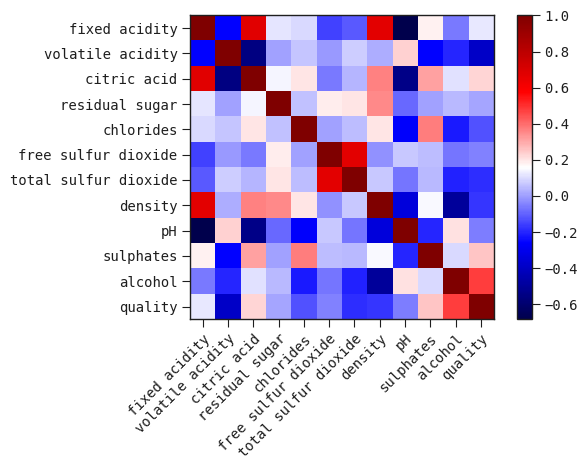

In [5]:
plt.imshow(df.corr(),cmap='seismic')
plt.colorbar()
plt.gca().set_xticks(np.arange(len(df.columns)))
plt.gca().set_yticks(np.arange(len(df.columns)))
plt.gca().set_xticklabels(labels=df.columns)
plt.gca().set_yticklabels(labels=df.columns)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.tight_layout()
plt.show()


In [6]:
X = df.drop(columns=['quality'])
y=df['quality']

In [7]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
results = []

In [10]:
name = 'lin_reg'
model=LinearRegression()
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )

R: 0.3596184851702914
MAE: 0.5192093699607553
MSE: 0.45313395989350175
RMSE: 0.6731522561007293


In [11]:
name = "lasso"
model=Lasso(alpha=0.01)
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )

R: 0.3094916266581692
MAE: 0.5501797841804418
MSE: 0.48860372497667937
RMSE: 0.6990019491937626


In [12]:
name = "ridge"
model=Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )

R: 0.3596720743445745
MAE: 0.5192686950325047
MSE: 0.453096040193779
RMSE: 0.6731240897440672


In [13]:
name = "rfecv"
regressor = LinearRegression()
model = RFECV(regressor, step=1, cv=10)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )

R: 0.35875691504135665
MAE: 0.5197285185953049
MSE: 0.45374360691673593
RMSE: 0.67360493385718


In [14]:
name = "rfe"
regressor = LinearRegression()
model = RFE(regressor, n_features_to_select=5, step=1)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )


R: 0.3513962335964923
MAE: 0.5261759565299171
MSE: 0.458952025107122
RMSE: 0.6774599804469058


In [15]:
name = "lassolarscv"
model = LassoLarsCV(cv=5).fit(X, y)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )


R: 0.3585321979296128
MAE: 0.520493438942812
MSE: 0.4539026167450059
RMSE: 0.6737229525146119


In [16]:
name = "lassolarsic"
model = LassoLarsIC(criterion='aic')     
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
r = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )


R: 0.3568181299702793
MAE: 0.5224911988433201
MSE: 0.45511549123303036
RMSE: 0.6746224805274653


In [17]:
name = "SR"

ql = feyn.connect_qlattice()
ql.reset(random_seed=42)

train, test = feyn.tools.split(df, ratio=(3,1), random_state=42)


stypes = {
    'neighbourhood_group': 'c', 
    'neighbourhood': 'c', 
    'room_type': 'c'
}
models = ql.auto_run(
    train,
    output_name='quality',
    stypes=stypes
    )
best = models[0]
best.plot(train, test)

r = best.r2_score(test)
mae = best.mae(test)
mse = best.mse(test)
rmse = best.rmse(test)
results.append({"name": name, "r": r, "mae": mae, "mse": mse, "rmse": rmse})
print('R:',r)
print('MAE:',mae )
print('MSE:', mse)
print('RMSE:',rmse )

R: 0.34436373654293595
MAE: 0.49330568097508776
MSE: 0.3977704233127541
RMSE: 0.6306904338205505


In [18]:
best_result = min(results, key=lambda x: x['rmse'])
print("best result:",best_result['name'])

best result: SR
